In [13]:
# importing the relavent libraries for calculation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# importing the data
a = pd.read_excel('ex2.xlsx')
a

,Unnamed: 0,Unnamed: 1
0,Sw,So
1,0.3,0.7
2,0.340833,0.659167
3,0.381667,0.618333
4,0.4225,0.5775
5,0.463333,0.536667
6,0.504167,0.495833
7,0.545,0.455
8,0.585833,0.414167
9,0.626667,0.373333


In [15]:
a.columns

Index(['Unnamed: 0', 'Unnamed: 1'], dtype='object')

In [16]:
a.columns = a.iloc[0]
a.columns
a

,Sw,So
0,Sw,So
1,0.3,0.7
2,0.340833,0.659167
3,0.381667,0.618333
4,0.4225,0.5775
5,0.463333,0.536667
6,0.504167,0.495833
7,0.545,0.455
8,0.585833,0.414167
9,0.626667,0.373333


In [17]:
a = a.drop(a.index[0])


In [18]:
#converting columns into array
sw = np.array(a['Sw'])
sw = sw.astype('float')
sw

array([0.3       , 0.34083333, 0.38166667, 0.4225    , 0.46333333,
       0.50416667, 0.545     , 0.58583333, 0.62666667, 0.6675    ,
       0.70833433])

In [19]:
# formula for swe = (sw - swr)/(1-swr-snr)
# swr=0.3
#snr = 0.05

w = 1-0.3-0.05
swe = (sw - 0.3)/w
swe


array([0.        , 0.06282051, 0.12564103, 0.18846154, 0.25128205,
       0.31410256, 0.37692308, 0.43974359, 0.5025641 , 0.56538462,
       0.62820667])

In [20]:
#krn = ((1-swe)^2)*(1-swe^4)
krnDr = ((1-swe)**2)*(1-swe**4)
krnDr


array([1.        , 0.87829171, 0.76431311, 0.65776385, 0.55834354,
       0.46587594, 0.38038886, 0.30214985, 0.23165763, 0.16958925,
       0.1167018 ])

In [21]:
# coverting all oil saturation into array
so = np.array(a['So'])
so = so.astype('float')
# k_(r,nw)^Im (S_nw )= k_(r,nw)^Dr (S_nwi )* [(S_nw-S_nwt)/(S_nwi-S_nwt )]^β
# b =[(S_nw-S_nwt)/(S_nwi-S_nwt )]
# β = 1.5
b = (so-0.291667)/(0.7-0.291667)
b

array([ 1.00000000e+00,  8.99999919e-01,  7.99999836e-01,  6.99999755e-01,
        5.99999674e-01,  4.99999591e-01,  3.99999510e-01,  2.99999429e-01,
        1.99999346e-01,  9.99992653e-02, -3.26449246e-06])

In [32]:
krnIm = (b**1.5)*krnDr
krnIm[10]=0
krnIm

C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in power
  """Entry point for launching an IPython kernel.


array([1.        , 0.75135707, 0.54381156, 0.38653673, 0.26026427,
       0.16616989, 0.09613306, 0.04929489, 0.02057172, 0.00537581,
       0.        ])

Text(0, 0.5, 'Relative Permeability')

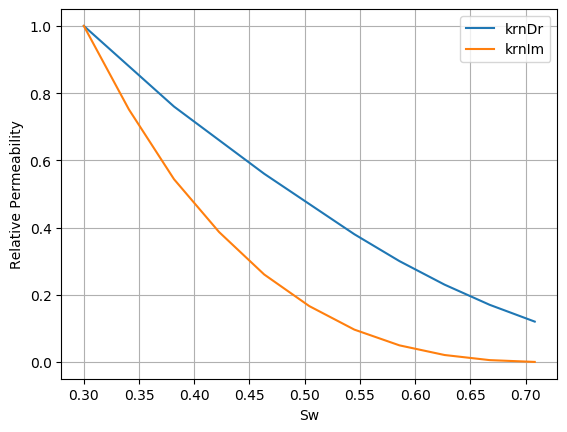

In [33]:
#plotting the graph relative permeability vs saturation
plt.style.use('default')
plt.plot(sw,krnDr,label='krnDr')
plt.plot(sw,krnIm,label='krnIm')
plt.legend()
plt.grid(True)
plt.xlabel('Sw')
plt.ylabel('Relative Permeability')

In [34]:
# truncating the value upto 2 decimal
swe = np.around(swe,2)
krnDr = np.around(krnDr,2)
krnIm = np.around(krnIm,2)
a['Swe'] = swe
a['KrnDr'] = krnDr
a['KrnIm'] = krnIm

In [35]:
a

,Sw,So,Swe,KrnDr,KrnIm
1,0.300000,0.700000,0.00,1.00,1.00
2,0.340833,0.659167,0.06,0.88,0.75
3,0.381667,0.618333,0.13,0.76,0.54
4,0.422500,0.577500,0.19,0.66,0.39
5,0.463333,0.536667,0.25,0.56,0.26
6,0.504167,0.495833,0.31,0.47,0.17
7,0.545000,0.455000,0.38,0.38,0.10
8,0.585833,0.414167,0.44,0.30,0.05
9,0.626667,0.373333,0.50,0.23,0.02
10,0.667500,0.332500,0.57,0.17,0.01


In [36]:
a = a.fillna(0)

In [38]:
#for reversal flow 
# ploting the trapped non-wetting phase saturation along flow reversal saturation.
d = [ 0.0]
for i in d:
    if i < 0.9:
        i = i + 0.1
        d.append(i)
Rswni = np.array(d)

In [39]:
Rswnt = Rswni/(1+2*Rswni)
Rswnt

array([0.        , 0.08333333, 0.14285714, 0.1875    , 0.22222222,
       0.25      , 0.27272727, 0.29166667, 0.30769231, 0.32142857,
       0.33333333])

Text(0, 0.5, 'Swnt')

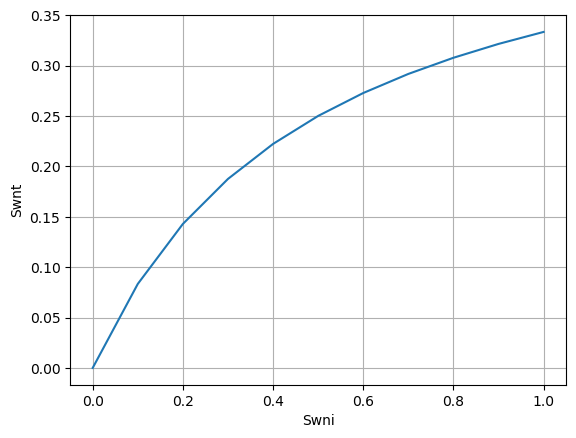

In [40]:
# plotting the Swnt VS Swni
plt.style.use('default')
plt.plot(Rswni,Rswnt)
plt.grid(True)
plt.xlabel('Swni')
plt.ylabel('Swnt')